<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 3 - Ensamblados y modelos avanzados </H3>
<hr style="height:2px;border:none"/>

<H4 align = 'center'>Gabriel Ortega </H4>
<H4 align = 'center'>Benjamín Riquelme </H4>

## 1. Calidad de un vino
---

Existen muchas variedades de vino existentes debido a los distintos gustos que tienen las personas. Del gusto se desprende la calidad que una persona le podría asignar a un vino, el cual proviene del gusto de la persona en particular, o bien, a la gran cantidad de quı́micos y procesos que se aplican a la producción de vino. Para el área de negocios, el estimar cuál es la calidad de un vino en base a la apreciación del público es una tarea bastante difı́cil.  
Para esta actividad se trabajará con dos *datasets* asociados a las variantes tinto y blanco del vino portugués
”Vinho Verde”[[1]](#refs). Debido a temas privados solo se cuenta con las caracterı́stcas fisioquı́micas asociadas a un
vino en particular, los cuales corresponden a 11 atributos numéricos descritos en el siguiente __[link](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names)__.

Este problema puede ser abordado como clasificación de 11 clases o de regresión, ya que el atributo a estimar,
*quality*, tiene un dominio como valor entero 0 y 10. La forma de resolverlo será a través de **ensamblados**.

<img src="https://uploads.toptal.io/blog/image/92064/toptal-blog-image-1454584112948-fc1d35939aa1886bf30c816b3ac20e21.jpg" title="Title text" width="20%"  />


> a) Carge los dos dataset en un único dataframe de pandas, además de agregar una columna indicando si es vino tinto o blanco. Describa el dataset a trabajar.

Debido a que se deben juntar 2 datasets, uno de vino tinto y otro de vino blanco, se creara una columna "tipo" y se asiganará el valor 1 al vino blanco y el valor 2 al vino tinto, esto es para que se sigan teniendo datos solamente de índoles numérico, encontramos que esto tiene más sentido al valor 0 o 1 ya que eso es más referente a presencia de atributo o no.

In [1]:
import pandas as pd
df_red = pd.read_csv("winequality-red.csv",sep=";")
df_white = pd.read_csv("winequality-white.csv",sep=";")
tinto = []
blanco = []
for i in range (df_white.shape[0]):
    #blanco = 1
    blanco.append(1)
for i in range (df_red.shape[0]):
    #tinto = 2 
    tinto.append(2)
df_white["tipo"]=blanco
df_red["tipo"]=tinto
df = pd.concat([df_red,df_white], axis=0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [4]:
print("Muestras de vino rojo: {}".format(df_red.shape[0]))
print("Muestras de vino blanco: {}".format(df_white.shape[0]))
print("Porcentaje rojo y blanco: {} y {}".format(df_red.shape[0]/df.shape[0], df_white.shape[0]/df.shape[0]))

Muestras de vino rojo: 1599
Muestras de vino blanco: 4898
Porcentaje rojo y blanco: 0.2461135908881022 y 0.7538864091118977


Cada muestra del dataset se presenta a través de propiedades químicas del vino correspondiente, en total corresponde a 11 columnas del dataset, y una columna para presentar el tipo de vino al que corresponde la muestra. La última columna restante, *quality*, corresponde a la calidad del vino en una escala entera del 0 al 10.
Además, se ve una mayor cantidad de vinos blancos, lo cual puede dejar subrepresentados los vinos rojos.

> b) Aborde este problema como si fuera de clasificación con multiples clases para predecir el valor de calidad de un vino, es decir, utilice las distintas caracterı́sticas fisioquı́micas presentes en los datos para estimar la etiqueta ¿Cuántas clases son y cuántos ejemplos hay por clase? ¿Qué sucede con predecir si un vino tiene calidad mínima (0) o máxima(10)? Además para el propósito académico de esta actividad cree un conjunto de pruebas (20%)  para evaluar la generalización final del modelo y otro de validación (20%) si estima conveniente. 

In [5]:
print("Todas las clases de calidad:", set(df["quality"]))
print("Clases de calidad en vinos rojos: {}".format(sorted(df_red["quality"].unique().tolist())))
print("Clases de calidad en vinos blancos: {}".format(sorted(df_white["quality"].unique().tolist())))

Todas las clases de calidad: {3, 4, 5, 6, 7, 8, 9}
Clases de calidad en vinos rojos: [3, 4, 5, 6, 7, 8]
Clases de calidad en vinos blancos: [3, 4, 5, 6, 7, 8, 9]


Se tienen 7 clases de calidad, son discretas y van del 3 al 9 por lo que predecir un vino de calidad 0 o calidad 10 no debería ser posible dado el conjunto de entrenamiento ya que el modelo no tendría ejemplos de dicha clase para catalogarlas, lo mismo sucede con calidades 1 y 2. Este comportamiento se aprecia en ambos tipos de vino.  
A continuación, se procede a realizar la división en un conjunto de pruebas, validación y entrenamiento

In [6]:
from sklearn.model_selection import train_test_split
#no hay seed fijo asi que depende
y = df["quality"].values
x = df.drop(["quality"],axis=1)
X_train, resto_x, Y_train, resto_y = train_test_split(x,y,test_size = 0.4)
X_val, X_test, Y_val, Y_test = train_test_split(resto_x,resto_y,test_size=0.5)
print("X Train: ",X_train.shape," Y Train: ",Y_train.shape)
print("X Val: ",X_val.shape," Y Val: ",Y_val.shape)
print("X Test: ",X_test.shape," Y Test: ",Y_test.shape)

X Train:  (3898, 12)  Y Train:  (3898,)
X Val:  (1299, 12)  Y Val:  (1299,)
X Test:  (1300, 12)  Y Test:  (1300,)


> c) Entrene un solo Árbol de Clasificación de múltiples niveles para resolver el problema. Defina un Árbol **no regularizado** (como el que no tiene límites en su profundidad) y otro Árbol **regularizado** (variando los hiper-parámetros que prefiera, por ejemplo, los más comunes como la profundidad, el número mínimo de datos para realizar *split* o el número mínimo de datos en cada hoja), recuerde que las **decisiones** no pueden ser basadas mirando el conjunto de pruebas. Debido al desbalanceo que se produce en las clases mida la métrica F1-score [[2]](#refs) sobre el conjunto de entrenamiento y de pruebas.

La métrica F1 tiene en cuenta tanto *"precision"* como *"recall"*, donde *precision* es la precisión del modelo y *recall* es la snesibilidad frente a la cantidad de ejemplos vistos, como hay un desbalance de vinos (1599 tintos y 4898 blancos), debido a esto se opta por la métrica F1. Se elige un F1 Score micro por sobre los otros métodos,ya que como este método computa el score al considerar el aporte individual de cada clase, para evitar problemas de subrepresentación de las clases presentes en las clases de entrenamiento[[6]](#refs).

In [7]:
#Arbol no regularizado
from sklearn.tree import DecisionTreeClassifier as Arbol
from sklearn.metrics import f1_score
Arbol_noreg = Arbol()
Arbol_noreg.fit(X_train,Y_train)
print("Training Done")
predicciones = Arbol_noreg.predict(X_val)
print("F1_Score en Validation Set: ",f1_score(y_true=Y_val,y_pred=predicciones,average="micro"))

Training Donde
F1_Score en Validation Set:  0.5850654349499615


Se tiene que el score de un arbol no regularizado en el conjunto de validación es 0.56, ahora se procederá a resolver el problema con un arbol regularizado ajustando los hiperparámetros.

In [8]:
#Arbol regularizado
from ipywidgets import interactive
def train_model_tree(depth,sample,atrib):
    model = Arbol() 
    model.set_params(max_depth=depth,criterion='gini',splitter='best',min_samples_split=10*sample,max_features=atrib)
    model.fit(X_train,Y_train)
    predicciones = model.predict(X_val)
    print("Test Accuracy in validation set: ",f1_score(y_true=Y_val,y_pred=predicciones,average="micro"))

d_min = 1 #define your range
d_max = 40 #define your range
sample_min = 1
sample_min_max = 5
features_min=1
features_max=X_train.shape[1]
interactive(train_model_tree,depth=(d_min,d_max),sample=(sample_min,sample_min_max),atrib=(features_min,features_max))

interactive(children=(IntSlider(value=20, description='depth', max=40, min=1), IntSlider(value=3, description=…

La mejor combinación es una profundiad de 9, un min split de tamaño 10 y que tome en cuenta todos los atributos para hacer el split. Y se obtuvo un score en el conjunto de validación de 0.5619, levemente mejor que el arbol no regularizado, el resto de modificaciones presenta scores más bajos.

>*Observación* El parámetro *sample* se pasará al modelo multiplicado por 10, valor correspondiene a la cantidad de elementos míminos para realizar un split en la proto-hoja.  


> d) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **Bagging**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en c)*) ¿Qué debería suceder? ¿Se visualiza *overfitting*? Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.

Según la teoría, el desempeño del bagging de arboles debería ser mejor al emplear árboles no regularizados en vez de árboles regularizados, lo que se espera de esta técnica disminuya la varianza de las estimaciones.

In [9]:
%%time
from sklearn.ensemble import BaggingClassifier
errores_noreg_train = []
errores_noreg_val = []
errores_reg_train = []
errores_reg_val = []
for i in range(150):
    #Entrenamos 150 bosques con i+1 arboles porque i parte de 0, o sea 1 arbol, 2, 3 ....150
    Random_noreg = BaggingClassifier(base_estimator=Arbol(), n_estimators=i+1, n_jobs=-1)
    Random_reg = BaggingClassifier(base_estimator=Arbol(max_depth=9,criterion='gini',splitter='best',min_samples_split=10), n_estimators=i+1, n_jobs=-1)
    Random_noreg.fit(X_train,Y_train)
    Random_reg.fit(X_train,Y_train)
    predicciones_noreg_train = Random_noreg.predict(X_train)
    predicciones_noreg_val = Random_noreg.predict(X_val)
    predicciones_reg_train = Random_reg.predict(X_train)
    predicciones_reg_val = Random_reg.predict(X_val)
    errores_noreg_train.append(f1_score(y_true=Y_train,y_pred=predicciones_noreg_train,average="micro"))
    errores_noreg_val.append(f1_score(y_true=Y_val,y_pred=predicciones_noreg_val,average="micro"))
    errores_reg_train.append(f1_score(y_true=Y_train,y_pred=predicciones_reg_train,average="micro"))
    errores_reg_val.append(f1_score(y_true=Y_val,y_pred=predicciones_reg_val,average="micro"))


Wall time: 4min 56s


In [10]:
def getmax(arreglo):
    pos = 0
    maximo = -1
    for i in range(len(arreglo)):
        if arreglo[i] > maximo:
            pos = i+1
            maximo = arreglo[i]
    return (pos,maximo)

In [11]:
import numpy as np
print("Media F1_Score train no reg: ",np.mean(errores_noreg_train))
pos,maximo = getmax(errores_noreg_train)
print("Maximo en posicion: ",pos," con valor: ",maximo)
print("---------------------------------------------------------")
print("Media F1_Score val no reg: ",np.mean(errores_noreg_val))
pos,maximo = getmax(errores_noreg_val)
print("Maximo en posicion: ",pos," con valor: ",maximo)
print("---------------------------------------------------------")
print("Media F1_Score train reg: ",np.mean(errores_reg_train))
pos,maximo = getmax(errores_reg_train)
print("Maximo en posicion: ",pos," con valor: ",maximo)
print("---------------------------------------------------------")
print("Media F1_Score val reg: ",np.mean(errores_reg_val))
pos,maximo = getmax(errores_reg_val)
print("Maximo en posicion: ",pos," con valor: ",maximo)


Media F1_Score train no reg:  0.9950076962544895
Maximo en posicion:  42  con valor:  1.0
---------------------------------------------------------
Media F1_Score val no reg:  0.6637977931742366
Maximo en posicion:  76  con valor:  0.6843725943033102
---------------------------------------------------------
Media F1_Score train reg:  0.7631024456986488
Maximo en posicion:  24  con valor:  0.7750128270908158
---------------------------------------------------------
Media F1_Score val reg:  0.6206312548113934
Maximo en posicion:  25  con valor:  0.634334103156274


Comparando los puntajes, se ve que lo que enuncia la teoría se cumple, los arboles regularizados presentan puntajes mas altos que los arboles regularizados utilizando la técnica de bagging, además se tiene que el mejor bosque de arboles no regularizados es mejor que el mejor bosque de arboles regularizados según la mejor combinación que se encontró en el inciso anterior. Ahora se procederá a graficar los errores de entrenamiento y validación de árboles bosques.

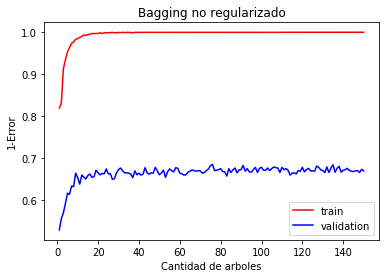

In [25]:
import matplotlib.pyplot as plt
indices = []
for i in range(150):
    indices.append(i+1)
plt.plot(indices,errores_noreg_train,"red",label="train")
plt.plot(indices,errores_noreg_val,"blue",label="validation")
plt.title("Bagging no regularizado")
plt.xlabel("Cantidad de arboles")
plt.ylabel("1-Error")
plt.legend()
plt.show()

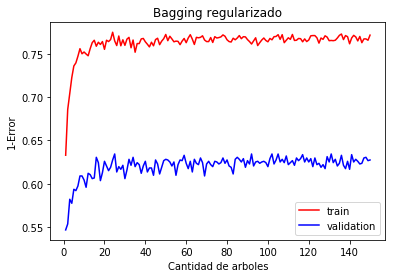

In [24]:
plt.plot(indices,errores_reg_train,"red",label="train")
plt.plot(indices,errores_reg_val,"blue",label="validation")
plt.title("Bagging regularizado")
plt.xlabel("Cantidad de arboles")
plt.ylabel("1-Error")
plt.legend()
plt.show()

El bagging regularizado no presente una tendencia a overfitting hasta los 150 árboles, ya que se mantiene la oscilación de ambos errores hasta esa cantidad, no se eligió una cantidad mayor porque ya se tuvo un máximo en validación y agregar más árboles aumenta el tiempo de entrenamiento.

Respecto al bagging no regularizado claramente se ve overfitting ya que el error de entrenamiento se queda en 1 y el error de validación sigue oscilando por lo que se observa overfitting en este bosque. 

En base a los resultados obtenidos se tiene que la mejor configuración es de 96 árboles no regularizados.

> e) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **AdaBoost**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en c)* ¿Se visualiza *overfitting*? ¿Qué técnica se utiliza, *re-muestrear* o *pesar* ejemplos? ¿Qué le parece más sensato?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).

Como el modelo a trabajar, árbol de clasificación, posee bajo sesgo y alta varianza, presenta un riesgo de overfitting el emplar *AdaBoost* con dicho modelo, debido a que reduce su varianza implicitamente, y aumenta su espacio de hipótesis, causando un gran incremento en la dimensión VC, mientras que el mismo algoritmo busca reducir el error de entrenamiento. Debido a este problema, se espera apreciar un mejor rendimiento en validación al emplear un árbol regularizado como modelo base.

In [14]:
%%time
from sklearn.ensemble import AdaBoostClassifier
errores_noreg_train2 = []
errores_noreg_val2 = []
errores_reg_train2 = []
errores_reg_val2 = []
for i in range(150):
    #Similar al bosquecito
    Random_noreg = AdaBoostClassifier(base_estimator=Arbol(), n_estimators=i+1)
    Random_reg = AdaBoostClassifier(base_estimator=Arbol(max_depth=9,criterion='gini',splitter='best',min_samples_split=10), n_estimators=i+1)
    Random_noreg.fit(X_train,Y_train)
    Random_reg.fit(X_train,Y_train)
    predicciones_noreg_train = Random_noreg.predict(X_train)
    predicciones_noreg_val = Random_noreg.predict(X_val)
    predicciones_reg_train = Random_reg.predict(X_train)
    predicciones_reg_val = Random_reg.predict(X_val)
    errores_noreg_train2.append(f1_score(y_true=Y_train,y_pred=predicciones_noreg_train,average="micro"))
    errores_noreg_val2.append(f1_score(y_true=Y_val,y_pred=predicciones_noreg_val,average="micro"))
    errores_reg_train2.append(f1_score(y_true=Y_train,y_pred=predicciones_reg_train,average="micro"))
    errores_reg_val2.append(f1_score(y_true=Y_val,y_pred=predicciones_reg_val,average="micro"))

Wall time: 5min 9s


In [15]:
import numpy as np
print("Media F1_Score train no reg: ",np.mean(errores_noreg_train2))
pos,maximo = getmax(errores_noreg_train2)
print("Maximo en posicion: ",pos," con valor: ",maximo)
print("---------------------------------------------------------")
print("Media F1_Score val no reg: ",np.mean(errores_noreg_val2))
pos,maximo = getmax(errores_noreg_val2)
print("Maximo en posicion: ",pos," con valor: ",maximo)
print("---------------------------------------------------------")
print("Media F1_Score train reg: ",np.mean(errores_reg_train2))
pos,maximo = getmax(errores_reg_train2)
print("Maximo en posicion: ",pos," con valor: ",maximo)
print("---------------------------------------------------------")
print("Media F1_Score val reg: ",np.mean(errores_reg_val2))
pos,maximo = getmax(errores_reg_val2)
print("Maximo en posicion: ",pos," con valor: ",maximo)

Media F1_Score train no reg:  1.0
Maximo en posicion:  1  con valor:  1.0
---------------------------------------------------------
Media F1_Score val no reg:  0.5920143700282269
Maximo en posicion:  92  con valor:  0.6066204772902233
---------------------------------------------------------
Media F1_Score train reg:  0.9660697793740379
Maximo en posicion:  107  con valor:  0.9979476654694716
---------------------------------------------------------
Media F1_Score val reg:  0.6394508596356172
Maximo en posicion:  138  con valor:  0.6766743648960739


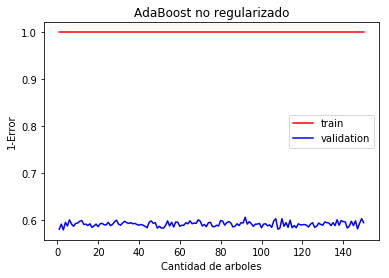

In [23]:
import matplotlib.pyplot as plt
indices = []
for i in range(150): #usar mismo range que el de entrenamiento en el for gigante
    indices.append(i+1)
plt.plot(indices,errores_noreg_train2,"red",label="train")
plt.plot(indices,errores_noreg_val2,"blue",label="validation")
plt.title("AdaBoost no regularizado")
plt.xlabel("Cantidad de arboles")
plt.ylabel("1-Error")
plt.legend()
plt.show()

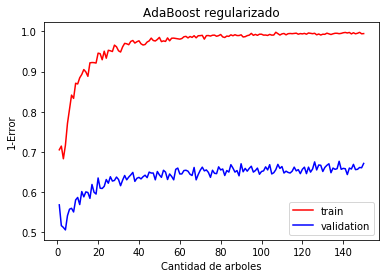

In [22]:
plt.plot(indices,errores_reg_train2,"red",label="train")
plt.plot(indices,errores_reg_val2,"blue",label="validation")
plt.title("AdaBoost regularizado")
plt.xlabel("Cantidad de arboles")
plt.ylabel("1-Error")
plt.legend()
plt.show()

Como se esperaba, se aprecia una tendencia extrema de overfitting al aplicar *AdaBoost* con árboles no regularizados, con inestabilidad en el error de entrenamiento al aumentar la cantidad de modelos ensamblados con este método.  
También se aprecia el comportamiento esperado al emplear arboles regularizados, correspondiente a una menor tendencia a overfitting (se aprecia que el error de entrenamiento se mantiene oscilante) y una mejora progresiva en el error de validación con una mayor cantidad de árboles.  

El mejor desempeño obtenido corresponde a emplear 122 arboles regularizados en el ensamblado.

> f) Pruebe otra técnica de ensamblado dedicada a árboles de decisión, que combina el muestreo *boostrap* de *Bagging* con muestreo sobre las *features*: **Random Forest**, compare el Árbol **no regularizado** con el **regularizado** ¿Se visualiza *overfitting*?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen el F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.


In [18]:
%%time
from sklearn.ensemble import RandomForestClassifier
errores_noreg_train3 = []
errores_noreg_val3 = []
errores_reg_train3 = []
errores_reg_val3 = []
for i in range(150):
    #Similar al bosquecito
    Random_noreg = RandomForestClassifier(n_estimators=i+1, n_jobs=-1)
    Random_reg = RandomForestClassifier(n_estimators=i+1, max_depth=9, criterion='gini', min_samples_split=10, n_jobs=-1)
    Random_noreg.fit(X_train,Y_train)
    Random_reg.fit(X_train,Y_train)
    predicciones_noreg_train = Random_noreg.predict(X_train)
    predicciones_noreg_val = Random_noreg.predict(X_val)
    predicciones_reg_train = Random_reg.predict(X_train)
    predicciones_reg_val = Random_reg.predict(X_val)
    errores_noreg_train3.append(f1_score(y_true=Y_train,y_pred=predicciones_noreg_train,average="micro"))
    errores_noreg_val3.append(f1_score(y_true=Y_val,y_pred=predicciones_noreg_val,average="micro"))
    errores_reg_train3.append(f1_score(y_true=Y_train,y_pred=predicciones_reg_train,average="micro"))
    errores_reg_val3.append(f1_score(y_true=Y_val,y_pred=predicciones_reg_val,average="micro"))

Wall time: 2min 39s


In [19]:
import numpy as np
print("Media F1_Score train no reg: ",np.mean(errores_noreg_train3))
pos,maximo = getmax(errores_noreg_train3)
print("Maximo en posicion: ",pos," con valor: ",maximo)
print("---------------------------------------------------------")
print("Media F1_Score val no reg: ",np.mean(errores_noreg_val3))
pos,maximo = getmax(errores_noreg_val3)
print("Maximo en posicion: ",pos," con valor: ",maximo)
print("---------------------------------------------------------")
print("Media F1_Score train reg: ",np.mean(errores_reg_train3))
pos,maximo = getmax(errores_reg_train3)
print("Maximo en posicion: ",pos," con valor: ",maximo)
print("---------------------------------------------------------")
print("Media F1_Score val reg: ",np.mean(errores_reg_val3))
pos,maximo = getmax(errores_reg_val3)
print("Maximo en posicion: ",pos," con valor: ",maximo)

Media F1_Score train no reg:  0.9951975371985634
Maximo en posicion:  32  con valor:  1.0
---------------------------------------------------------
Media F1_Score val no reg:  0.6649781883500129
Maximo en posicion:  139  con valor:  0.6866820631254812
---------------------------------------------------------
Media F1_Score train reg:  0.7310124850350608
Maximo en posicion:  49  con valor:  0.7437147255002565
---------------------------------------------------------
Media F1_Score val reg:  0.6134308442391584
Maximo en posicion:  80  con valor:  0.6297151655119323


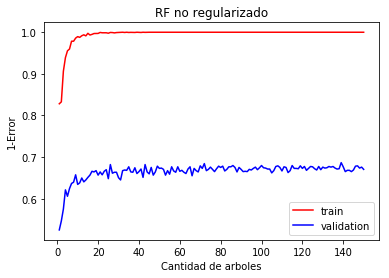

In [20]:
indices = []
for i in range(150): #usar mismo range que el de entrenamiento en el for gigante
    indices.append(i+1)
plt.plot(indices,errores_noreg_train3,"red",label="train")
plt.plot(indices,errores_noreg_val3,"blue",label="validation")
plt.title("RF no regularizado")
plt.xlabel("Cantidad de arboles")
plt.ylabel("1-Error")
plt.legend()
plt.show()

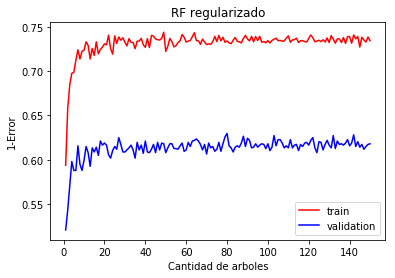

In [21]:
plt.plot(indices,errores_reg_train3,"red",label="train")
plt.plot(indices,errores_reg_val3,"blue",label="validation")
plt.title("RF regularizado")
plt.xlabel("Cantidad de arboles")
plt.ylabel("1-Error")
plt.legend()
plt.show()

De manera cualitativa, el comportamiento obtenido con random forest es semejante al obtenido con bagging de árboles, incluso en el comportamiento de overfitting. Pero al comparar los valores obtenidos, se ve una notable mejora en todos los score obtenidos, lo cual concuerda con lo planteado en la teoría en la consideración de la no independencia de las muestras trabajadas, lo que en la práctica ocurre la mayoria del tiempo.  
El mejor desempeño se obtuvo al emplear 112 arboles no regularizados.  

> g) Verifique que el **OOB error** (*out of bag error*) de los ensambladores que utilizan la técnica *boostrap* puede ser una alternativa como métrica de generalización, compárelo con el error calculado sobre el conjunto de pruebas y validación (o en su defecto *cross validation*).

De los 3 ensamblados empleados, random forest y bagging emplean *Bootstrap* en su remuestreo. Ambos poseen dichos atributos correspondientes despues de su entrenamiento.

In [34]:
%%time
errores_noreg_train = []
errores_noreg_val = []
errores_reg_train = []
errores_reg_val = []
oob_noreg= []
oob_reg = []
for i in range(150):
    Random_noreg = RandomForestClassifier(oob_score=True, n_estimators=i+1, n_jobs=-1)
    Random_reg = RandomForestClassifier(oob_score=True, n_estimators=i+1, max_depth=9, criterion='gini', min_samples_split=10, n_jobs=-1)
    Random_noreg.fit(X_train,Y_train)
    Random_reg.fit(X_train,Y_train)
    oob_noreg.append(Random_noreg.oob_score_)
    oob_reg.append(Random_reg.oob_score_)
    predicciones_noreg_train = Random_noreg.predict(X_train)
    predicciones_noreg_val = Random_noreg.predict(X_val)
    predicciones_reg_train = Random_reg.predict(X_train)
    predicciones_reg_val = Random_reg.predict(X_val)
    errores_noreg_train.append(f1_score(y_true=Y_train,y_pred=predicciones_noreg_train,average="micro"))
    errores_noreg_val.append(f1_score(y_true=Y_val,y_pred=predicciones_noreg_val,average="micro"))
    errores_reg_train.append(f1_score(y_true=Y_train,y_pred=predicciones_reg_train,average="micro"))
    errores_reg_val.append(f1_score(y_true=Y_val,y_pred=predicciones_reg_val,average="micro"))  

d:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
d:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
d:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probab

d:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
d:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
d:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probab

Wall time: 3min 3s


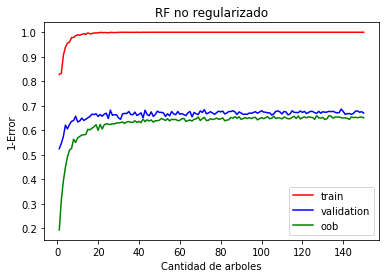

In [35]:
indices = []
for i in range(150): #usar mismo range que el de entrenamiento en el for gigante
    indices.append(i+1)
plt.plot(indices,errores_noreg_train3,"red",label="train f1")
plt.plot(indices,errores_noreg_val3,"blue",label="validation f1")
plt.plot(indices,oob_noreg,"green",label="oob")
plt.title("RF no regularizado")
plt.xlabel("Cantidad de arboles")
plt.ylabel("1-Error")
plt.legend()
plt.show()

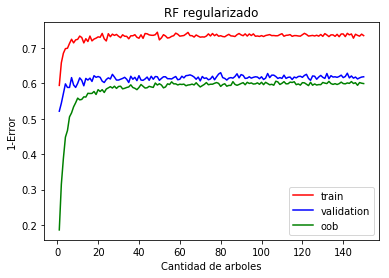

In [36]:
plt.plot(indices,errores_reg_train3,"red",label="train f1")
plt.plot(indices,errores_reg_val3,"blue",label="validation f1")
plt.plot(indices,oob_reg,"green",label="oob")
plt.title("RF regularizado")
plt.xlabel("Cantidad de arboles")
plt.ylabel("1-Error")
plt.legend()
plt.show()

In [37]:
%%time
errores_noreg_train = []
errores_noreg_val = []
errores_reg_train = []
errores_reg_val = []
oob_noreg= []
oob_reg = []
for i in range(150):
    Random_noreg = BaggingClassifier(base_estimator=Arbol(), n_estimators=i+1, n_jobs=-1, oob_score=True)
    Random_reg = BaggingClassifier(oob_score=True, base_estimator=Arbol(max_depth=9,criterion='gini',splitter='best',min_samples_split=10), n_estimators=i+1, n_jobs=-1)
    Random_noreg.fit(X_train,Y_train)
    Random_reg.fit(X_train,Y_train)
    oob_noreg.append(Random_noreg.oob_score_)
    oob_reg.append(Random_reg.oob_score_)
    predicciones_noreg_train = Random_noreg.predict(X_train)
    predicciones_noreg_val = Random_noreg.predict(X_val)
    predicciones_reg_train = Random_reg.predict(X_train)
    predicciones_reg_val = Random_reg.predict(X_val)
    errores_noreg_train.append(f1_score(y_true=Y_train,y_pred=predicciones_noreg_train,average="micro"))
    errores_noreg_val.append(f1_score(y_true=Y_val,y_pred=predicciones_noreg_val,average="micro"))
    errores_reg_train.append(f1_score(y_true=Y_train,y_pred=predicciones_reg_train,average="micro"))
    errores_reg_val.append(f1_score(y_true=Y_val,y_pred=predicciones_reg_val,average="micro"))  

d:\program files\python36\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\program files\python36\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
d:\program files\python36\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\program files\python36\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
d:\program files\python36\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. Th

d:\program files\python36\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\program files\python36\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
d:\program files\python36\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\program files\python36\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
d:\program files\python36\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. Th

Wall time: 5min 21s


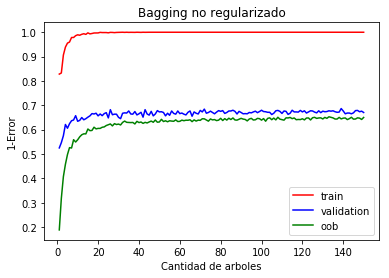

In [38]:
indices = []
for i in range(150): #usar mismo range que el de entrenamiento en el for gigante
    indices.append(i+1)
plt.plot(indices,errores_noreg_train3,"red",label="train f1")
plt.plot(indices,errores_noreg_val3,"blue",label="validation f1")
plt.plot(indices,oob_noreg,"green",label="oob")
plt.title("Bagging no regularizado")
plt.xlabel("Cantidad de arboles")
plt.ylabel("1-Error")
plt.legend()
plt.show()

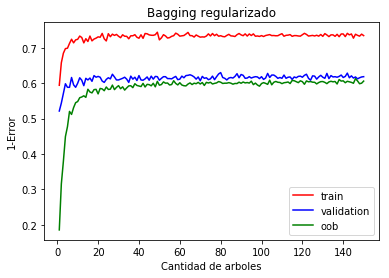

In [39]:
plt.plot(indices,errores_reg_train3,"red",label="train f1")
plt.plot(indices,errores_reg_val3,"blue",label="validation f1")
plt.plot(indices,oob_reg,"green",label="oob")
plt.title("Bagging regularizado")
plt.xlabel("Cantidad de arboles")
plt.ylabel("1-Error")
plt.legend()
plt.show()

En ambos casos, se aprecia que sigue un comportamiento similar a la métrica F1, e incluso un comportamiento similar a la suma (o diferencia) de los score F1 de entrenamiento y validación, lo cual puede resultar un buen estimador de generalización para los ensamblados en base a bagging de árboles, pese a perder una leve cantidad de puntaje respecto a validación.  
Pero, esto no es conveniente si se emplea pocos estimadores en el ensamblado, debido a que se posee pocos remuestreos realizados, lo cual hace no confiable el uso de OOB en dichos casos.

> h) Entrene alguna otra máquina de aprendizaje, elegida por usted de entre todas las vistas en el curso, para resolver el problema. Elija los hiper-parámetros que estime convenientes intentando aumentar el *F1-scor*e obtenido por los algoritmos anteriores ¿Se logra una mejora? ¿Por qué?

Como la dimensionalidad del problema es relativamente baja, resulta interesante emplear KNN para generar fronteras no lineales para clasificar los vinos según su calidad. Se probará tanto en su forma de regresor y clasificador. Se redondeará los valores predecidos con el regresor para mantener clasificaciones enteras.

In [41]:
#Modelos posibles: NB, SVM, ANN, KNN
from sklearn.neighbors import KNeighborsRegressor as KNN_R
from sklearn.neighbors import KNeighborsClassifier as KNN_C

In [46]:
vecinos_r = []
vecinos_c = []
for i in range(1,5):
    modelo_r = KNN_R(n_neighbors=5*i)
    modelo_c = KNN_C(n_neighbors=5*i)
    modelo_r.fit(X_train,Y_train)
    modelo_c.fit(X_train,Y_train)
    vecinos_r.append(modelo_r)
    vecinos_c.append(modelo_c)
    

In [50]:
errores_classif_train = []
errores_regres_train = []
errores_classif_valid = []
errores_regres_valid = []
indices = []
for i in range(1,5):
    indices.append(i*5)
    prediccion_classif_train = vecinos_c[i-1].predict(X_train)
    prediccion_classif_valid = vecinos_c[i-1].predict(X_val)
    prediccion_regres_train = list(map(round, vecinos_r[i-1].predict(X_train)))
    prediccion_regres_valid = list(map(round, vecinos_r[i-1].predict(X_val)))
    errores_classif_train.append(f1_score(y_true=Y_train, y_pred=prediccion_classif_train, average="micro"))
    errores_regres_train.append(f1_score(y_true=Y_train, y_pred=prediccion_regres_train, average="micro"))
    errores_classif_valid.append(f1_score(y_true=Y_val, y_pred=prediccion_classif_valid, average="micro"))
    errores_regres_valid.append(f1_score(y_true=Y_val, y_pred=prediccion_regres_valid, average="micro"))

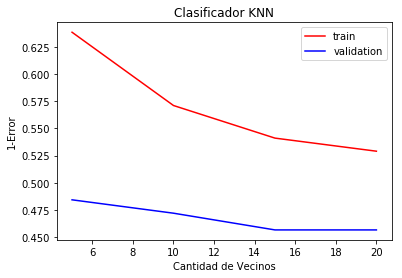

In [51]:
plt.plot(indices,errores_classif_train ,"red",label="train")
plt.plot(indices,errores_classif_valid,"blue",label="validation")
plt.title("Clasificador KNN")
plt.xlabel("Cantidad de Vecinos")
plt.ylabel("1-Error")
plt.legend()
plt.show()

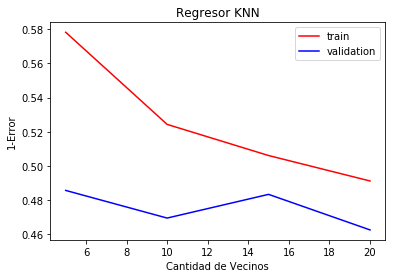

In [52]:
plt.plot(indices,errores_regres_train ,"red",label="train")
plt.plot(indices,errores_regres_valid,"blue",label="validation")
plt.title("Regresor KNN")
plt.xlabel("Cantidad de Vecinos")
plt.ylabel("1-Error")
plt.legend()
plt.show()

Usualmente, se recomienda usar una cantidad cercana a 5 como vecinos para este método, ya que el comportamiento se vuelve anómalo al emplear mayor cantidad de vecinos. Se puede apreciar una disminución en la capacidad de generalización en ambos casos, lo cual se espera a considerar cantidades ridiculas de vecinos.
Como se aprecia en ambos gráficos, KNN posee un mejor poder de generaliación respecto a los árboles y sus ensamblados, pero con un menor desempeño en la performance de validación.

> i) Compare y analice las distintas maneras con las que se resolvió el problema definido en b), por ejemplo incluya las decisiones que conlleva y los resultados que reflejan.

En primer lugar, uno de los grandes problemas del dataset es la "subjetividad" de la calidad. En otras palabras, los learners empleados no aprenderan la calidad del vino de manera global, mas bien simulará las preferencias del juez que generó dicha calificación: se busca predecir el juicio de cierto juez.  
Otro punto de vista, es que el dataset se haya obtenido a través de una recopilación de calificaciones de distintos jueces (estilo *Metacritic*), lo cual la identidad del juez puede afectar los resultados obtenidos debido a las preferencias particulares de cada juez y sus escalas de calidad, las cuales pueden ser "lineales" o no. Se presume que se asume que el dataset trabajado corresponde al primer caso mencionado.  

Por otro lado, para poder aplicar una regresión, se debe conocer si la escala empleada es lineal, logaritmica, etc., para poder elegir de buena manera el tipo de regresor a entrenar, lo cual se desconoce. Esto se traduce, por ejemplo para la escala lineal, que se debe conocer si la diferencia de calidad entre 0 y 1 es equivalente a la diferencia entre 9 y 10. Finalmente, como las clasificaciones corresponden son enteras, se deben obtener resultados enteros con el regresor. Esto implica que los resultados no enteros deban ser aproximados de alguna manera, lo cual se vuelve complicado al considerar lo mencionado para la selección del tipo de regresor. De manera burda, se debe diseñar distintos regresores capaces de entregar solo valores discretos, o regresor-clasificador.  

Al considerar todos los atributos, se espera un mejor ajuste en los árboles (considerando el riesgo de overfitting) respecto a KNN, lo cual se puede apreciar en los ensemblers empleados, los cuales reducen la varianza inherente de los modelos de árboles. Se espera que, escogiendo las mejores dimensiones (usando algún criterio de importancia como el entegado por random forest) el rendimiento de KNN mejore.

> j) Defina otra forma de combinar los valores que entregan los ensamblados al hacer predicciones y compare con lo que se hace actualmente, por ejemplo *Bagging* realiza el voto de la mayoría para clasificación y promedio para regresión, *AdaBoost* realiza una combinación ponderada de cada clasificador dependiendo de su *habilidad* (desempeño para clasificar el conjunto de entrenamiento).
```python
def combine_predictions(predictions):
    return #define !
list_estimators = model.estimators_
list_predictions = [estimator.predict(X_test) for estimator in list_estimators]
new_predictions = combine_predictions(list_predictions)
...#measure f1 score
f1_score(y_test, new_predictions)
```


> k) Utilice la técnica de ensamblado para seleccionar características, para ésto defina un criterio para estimar la importancia de los distintos atributos en el ensamblado, impleméntelo sobre alguno de los ensambladores entrenados para resolver el problema definido en b). Realice un *ranking* de importancia de atributos y seleccione las $k$ características más relevantes.

A partir de los resultados obtenidos previamente, como heuristica se emplea el random forest con mejor resultado, el cual emplea 112 árboles no regularizados, para estimar los atributos más importantes. Se seleccionarán los 4 atributos más importantes.

In [56]:
rf_importances = RandomForestClassifier(n_estimators=112, n_jobs=-1)
rf_importances.fit(X_train, Y_train)
print()

In [84]:
dicc_importancias = dict()
for i in range(len(list(X_train))):
    dicc_importancias[rf_importances.feature_importances_[i]] = list(X_train)[i]

In [83]:
atributos_importantes = [dicc_importancias[sorted(rf_importances.feature_importances_)[-i-1]] for i in range(4)]
print(atributos_importantes)

['alcohol', 'volatile acidity', 'density', 'total sulfur dioxide']


Estos atributos elegidos, de cierta manera, afectan en el sabor, olor y la textura del vino, lo cual son atributos que usualmente son los que influyen en la decisión de catadores de vino. Aunque el alcohol de los vinos deberian ser el mismo, en realidad estan dentro de un rango según el tipo de vino, lo cual puede cambiar la percepción de este en la boca de una persona.

> l) Entrene la máquina de aprendizaje definida en h) sobre las $k$ carecterísticas derivadas del punto anterior ¿Mejora los resultados sobre ésta máquina de aprendizaje?

In [85]:
X_train_red = X_train[atributos_importantes]
X_val_red = X_val[atributos_importantes]

vecinos_r = []
vecinos_c = []
for i in range(1,5):
    modelo_r = KNN_R(n_neighbors=5*i)
    modelo_c = KNN_C(n_neighbors=5*i)
    modelo_r.fit(X_train_red,Y_train)
    modelo_c.fit(X_train_red,Y_train)
    vecinos_r.append(modelo_r)
    vecinos_c.append(modelo_c)
    
errores_classif_train = []
errores_regres_train = []
errores_classif_valid = []
errores_regres_valid = []
indices = []
for i in range(1,5):
    indices.append(i*5)
    prediccion_classif_train = vecinos_c[i-1].predict(X_train_red)
    prediccion_classif_valid = vecinos_c[i-1].predict(X_val_red)
    prediccion_regres_train = list(map(round, vecinos_r[i-1].predict(X_train_red)))
    prediccion_regres_valid = list(map(round, vecinos_r[i-1].predict(X_val_red)))
    errores_classif_train.append(f1_score(y_true=Y_train, y_pred=prediccion_classif_train, average="micro"))
    errores_regres_train.append(f1_score(y_true=Y_train, y_pred=prediccion_regres_train, average="micro"))
    errores_classif_valid.append(f1_score(y_true=Y_val, y_pred=prediccion_classif_valid, average="micro"))
    errores_regres_valid.append(f1_score(y_true=Y_val, y_pred=prediccion_regres_valid, average="micro"))

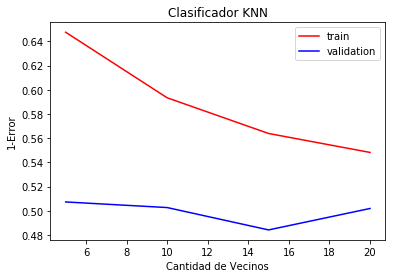

In [86]:
plt.plot(indices,errores_classif_train ,"red",label="train")
plt.plot(indices,errores_classif_valid,"blue",label="validation")
plt.title("Clasificador KNN")
plt.xlabel("Cantidad de Vecinos")
plt.ylabel("1-Error")
plt.legend()
plt.show()

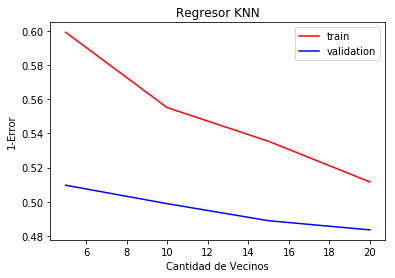

In [87]:
plt.plot(indices,errores_regres_train ,"red",label="train")
plt.plot(indices,errores_regres_valid,"blue",label="validation")
plt.title("Regresor KNN")
plt.xlabel("Cantidad de Vecinos")
plt.ylabel("1-Error")
plt.legend()
plt.show()

Como se esperaba, reducir la dimensionalidad hace maravillas en los resultados obtenidos en KNN, aumentando el score obtenido con 5 vecinos tanto en entrenamiento como en validación, y en ambos modelos trabajados. Esto explica que existen propiedades del vinos que generan ruido a KNN, las cuales al ignorarlas permite mejorar el rendimiento del modelo.

<a id="segundo"></a>
## 2. Redes Convolucionales sobre imágenes
---
Las redes neuronales hoy en día han sido extendidas a numerosas aplicaciones gracias a la arquitectura definida para cada tipo de problema. Las redes neuronales que aplican la operación de convolución [[3]](#refs) o convoluciones en sus capas son concidas como *CNN* o *ConvNets*, lo cual se especializa en trabajar en datos con forma matricial (ya sea bi-dimensional o tri-dimensional), lo cual se adecúa perfectamente a imágenes (matrices), ya que gracias a su conectividad local se especializan en reconocer patrones sobre los datos de manera espacial, como refleja la siguiente imagen:

<img src="https://cdn-images-1.medium.com/max/1600/1*N4h1SgwbWNmtrRhszM9EJg.png" title="Title text" width="90%" />


En esta actividad trabajará con un extracto bastante pequeño del dataset conocido como **101-Food**[[4]](#refs), el cual consta de mil imágenes pertenecientes a 3 clases (*Hambuger, Hot Dog* y *Pizza*) separados en conjunto de entrenamiento y validación.  
El extracto pequeño del dataset con el que se trabajará deberá ser descargado del siguiente __[link](https://www.dropbox.com/s/56xqazmhbh0doi7/food_data.zip?dl=0)__ a través de Dropbox.

> a) Construya funciones para leer los datos y cargarlos al momento de entrenar (durante cada *epoch*), para ésto utilice *Image Data Generator* de keras.

Los datos son imagenes de comida, se tienen 3 clases: 

* Hamburguesas
* Hot Dogs
* Pizza

Se cuenta con una carpeta de entrenamiento y cada una contiene una carpeta correspondiente a cada clase. También se cuenta con una carpeta de validación con la misma estructura.

In [1]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


ImageDataGenerator es una funcionalidad de keras que permite generar batchs de imágenes utilizando data en tiempo real aumentada, esto dará material de entrenamiento para la red neuronal en base a los parámetros dados.

El conjunto de entrenamiento sufre una pequeña transformación que consiste en una rotación, esto es para aumentar el número de datos ya que las imágenes tienen demasiadas dimensiones y esto permitirá aumentar el tamaño del conjunto de entrenamiento teniendo imágenes ligeramente distintas como se muestra en la siguiente imagen:

<img src="https://cdn-images-1.medium.com/max/1250/1*L07HTRw7zuHGT4oYEMlDig.jpeg" title=Ejemplo width="55%"/>

En base a esto es que en el código se ve una transformación del conjunto de entrenamiento y no de validación porque no es la idea aumentar este último.

In [47]:
train_datagen = ImageDataGenerator(
        rescale=1./255, #rescalamiento post-transformacion 
        shear_range=0.2, #angulo de desplazamiento, shearing es mas sencillo de hacer que transformacion ortogonal
        #rotar levemente la imagen en sentido antihorario
        zoom_range=0.2,
        horizontal_flip=True) #flips input horizontally -> vector

test_datagen = ImageDataGenerator(rescale=1./255) #no transformation
train_generator = train_datagen.flow_from_directory(
        'food_data/train',
        target_size=(150, 150),
        color_mode='rgb',
        batch_size=32)

validation_generator = test_datagen.flow_from_directory(
        'food_data/val',
        target_size=(150, 150),
        color_mode='rgb',
        batch_size=32)

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


> b) Utilice la red tradicional (*Feed Forward*) entregada en el código para ser entrenada sobre los datos vectorizados, esto es que cada imagen queda representada como un vector gigante, y las 3 clases a las que se enfrenta. Evalúe el modelo con la métrica *accuracy* sobre el conjunto de validación.

Una red neuronal *Feed Forward* consta de 3 partes: una capa de entrada, capas intermedias (capas ocultas) y la capa de salida. El objetivo de este modelo es aproximar una función *f\**, es decir si el output $ y = f^{*}(x)$ esta red se encarga de obtener un mapeo del tipo $f^{*}(x;\theta)$ y aprende los valores de $\theta$ que mejor aproximen la función.

El nombre de *Feed Forward* se debe a que la información fluye hacia adelante desde la capa de entrada hasta la capa de salida sin alguna retroalimentación que conecte la capa siguiente con la anterior.

Las epocas (epoch) son una forma de entrenamiento de la red neuronal

In [3]:
import sys
from PIL import Image
sys.modules['Image'] = Image

In [25]:
from IPython.display import display
from PIL import Image
from keras.models import Sequential
from keras.layers import *
model = Sequential()
model.add(Flatten(input_shape=train_generator.image_shape)) #full dense
model.add(BatchNormalization()) #to normalize the input..
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25)) #mata neuronas que no superen el threshold
model.add(Dense(128,activation='relu')) #128 
model.add(Dropout(0.25)) #vuelve a matar neurona que no superen el threshold
model.add(Dense(3,activation='softmax')) #softmax en capa de salida para probabilidad y asegurar que sumen 1 en clasificacion
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # Let's train the model using RMSprop
model.summary()
model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator.classes)//train_generator.batch_size, #samples//batch_size = 75
        epochs=25,
        validation_data=validation_generator,
        validation_steps=len(validation_generator.classes)//validation_generator.batch_size) # = 18

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 67500)             0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 67500)             270000    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               17280256  
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 387       
Total para

In [26]:
from keras.models import model_from_json

# guardarlo en json
model_json = model.to_json()
with open("FF_sincambio.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("FF_sincambiopesos.h5")
print("Saved model to disk")
 
# cargar json y crear modelo
json_file = open('FF_sincambio.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# cargar pesos al nuevo modelo
loaded_model.load_weights("FF_sincambiopesos.h5")
print("Loaded model from disk")

#Descomentar solo para compilar el modelo y testear, eso si, parece que cargarlo cambia un poco.
'''
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print("Accuracy validation: ",loaded_model.evaluate_generator(generator=validation_generator,steps=len(validation_generator.classes)//validation_generator.batch_size)[1])
'''

Saved model to disk
Loaded model from disk
Accuracy validation:  0.4859154921182444


En el entrenamiento se utilizan 25 épocas, una época es una pasada de los datos (tamaño del batch) por toda la red, en este caso se utilizan 75 iteraciones para pasar todos los datos en cada época ya que tenemos 2400 datos en el conjunto de entrenamiento y un tamaño de batch de 32. $\frac{2400}{32} = 75$

In [15]:
print("Accuracy validation: ",model.evaluate_generator(generator=validation_generator,steps=len(validation_generator.classes)//validation_generator.batch_size)[1])

Accuracy validation:  0.4894366201380609


Después de entrenar la red feed forward se tiene que la precisión en el conjunto de validación es del 50% aproximadamente

> c) Utilice la red convolucional (**CNN**) entregada en el código para ser entrenada sobre los datos brutos, matrices RGB de píxeles, y las 3 clases a las que se enfrenta. Evalúe el modelo con la métrica *accuracy* sobre el conjunto de validación. Compare.

Feedforward es una forma de aprendizaje mientras que CNN es un tipo de red, por lo que dependiendo de la forma de aprendizaje de una red CNN puede resultar en una FF CNN. En esta parte justamente se trabajará con este tipo ya que el modelo seguirá siendo secuencial, solamente que cambiarán las capas del modelo y se tendrán una arquitectura convolucional.

Las CNN utilizan capas de extracción de atributos que tienen filtros convolucionales no lineales mientras que las últimas capas son implementaciones sencillas de perceptrón para trabajar con los datos extraídos de las capas anteriores.

La activación que se utiliza en estas neuronas es "ReLU" (Rectified Linear Unit) que básicamente consiste en la introducción de no-linearidad en las neuronas, esto resulta bastante útil ya que los datos del mundo real no presentan linearidad la mayoría de los casos.

$$ ReLU = max(0,input)$$

Esto se aplica pixel a pixel y lo que hace es reemplazar los pixeles negativos por cero.

¿Por qué ReLU y no TanH o Sigmoidal? $\rightarrow$ ReLU ha probado ser mejor en la mayoría de casos.

La primera capa siempre es una capa de convolución, lo que hace esto es una matriz filtro . En simples palabras, la convolución es un filtro que adquiere características interesantes y las pasas a la siguiente parte, entonces, a diferencia de la red FF pura tendremos filtros entre las capas.

También las CNN implementan pooling que, en palabras simples, es: reducción de dimensionalidad mientras se retiene la información más importante, en este caso se usará MaxPool, una buen explicación es la siguiente imagen:

<img src="https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-10-at-3-38-39-am.png?w=768" title="MaxPool" width="40%" />

Se toma el mayor elemento y se elige como el representativo del grupo. Además, al igual que en la imagen, se trabajará con una matriz 2x2 para pooling. La gracia de esto es ir disminuyendo de a poco la dimensionalidad del problema lo que lo hace más simple de trabajar posteriormente en las capas más cercanas a la capa de salida.

In [21]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=train_generator.image_shape,activation='relu'))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) #matar neuronas para evitar overfitting, forzar a aprender mejor informacion
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) #matar neuronas para evitar overfitting, forzar a aprender mejor informacion
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5)) #matar neuronas para evitar overfitting, forzar a aprender mejor informacion
model.add(Dense(len(train_generator.class_indices),activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # Let's train the model using RMSprop
model.summary()
model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator.classes)//train_generator.batch_size, #samples//batch_size
        epochs=25,
        validation_data=validation_generator,
        validation_steps=len(validation_generator.classes)//validation_generator.batch_size)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 148, 148, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
__________

In [23]:
#guardar modelo post entrenamiento
from keras.models import model_from_json

# guardarlo en json
model_json = model.to_json()
with open("CNN_sincambio.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("CNN_sincambiopesos.h5")
print("Saved model to disk")
 
# cargar json y crear modelo
json_file = open('CNN_sincambio.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# cargar pesos al nuevo modelo
loaded_model.load_weights("CNN_sincambiopesos.h5")
print("Loaded model from disk")

''' # Descomentar solo para volver a compilar y probar el modelo
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print("Accuracy validation: ",loaded_model.evaluate_generator(generator=validation_generator,steps=len(validation_generator.classes)//validation_generator.batch_size)[1])
'''

Saved model to disk
Loaded model from disk


Comentando respecto al entrenamiendo de la CNN respecto a la FF (feedforward) el tiempo de entrenamiento es muchísimo mayor, 2 horas vs 15 minutos. Aunque a diferencia de la FF, se nota una mejoría en el accuracy durante el entrenamiento, por ejemplo, comparando entre la época 1 donde la accuracy es similar a la presentada en la red FF y la época 20 donde la accuracy de entrenamiento ya ronda los 0.75. En base a esto podemos decir que CNN aprende mejor que FF los atributos de la imágenes que las distinguen.

In [22]:
print("Accuracy validation: ",model.evaluate_generator(generator=validation_generator,steps=len(validation_generator.classes)//validation_generator.batch_size)[1])

Accuracy validation:  0.6602112676056338


Al probar con el mismo conjunto de validación, la precisión es aproximadamente un 20% más alta que el caso anterior, lo que muestra la superioridad de esta arquitectura de red neuronal en el ámbito de reconocimiento de imágenes. También calcularemos la matriz de confusión para comparar con el siguiente ejercicio

In [48]:
from sklearn.metrics import confusion_matrix 

# cargar json y crear modelo
json_file = open('CNN_sincambio.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# cargar pesos al nuevo modelo
loaded_model.load_weights("CNN_sincambiopesos.h5")
print("Loaded model from disk")

# Descomentar solo para volver a compilar y probar el modelo
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print("Accuracy validation: ",loaded_model.evaluate_generator(generator=validation_generator,steps=len(validation_generator.classes)//validation_generator.batch_size)[1])



Y_pred = loaded_model.predict_generator(validation_generator,len(validation_generator.classes)//validation_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
confusion_matrix = confusion_matrix(validation_generator.classes, y_pred)

Loaded model from disk
Accuracy validation:  0.6475694444444444


In [49]:
import pandas as pd
dictio = {'':[1,2,3],1:confusion_matrix[:,0],2:confusion_matrix[:,1],3:confusion_matrix[:,2]}
tabla = pd.DataFrame.from_dict(dictio)
aciertos = 0
fallos = 0
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        if i == j:
            aciertos += confusion_matrix[i,j]
        else:
            fallos += confusion_matrix[i,j]
print("Aciertos: ",aciertos)
print("Fallos: ",fallos)
print("Matriz de confusión \n")
tabla

Aciertos:  208
Fallos:  392
Matriz de confusión 



,,1,2,3
0,1,46,53,101
1,2,34,49,117
2,3,44,43,113


A partir de la matriz de confusión que se ve que la precisión y los aciertos no corresponden. Esto se comentará nuevamente en la siguiente pregunta.

> d) Genere un conjunto datos con incorrecta etiquetación de manera manual y vea si el modelo convolucional se sigue comportando de la misma manera. Para esto tome 100 imágenes aleatorias de entrenamiento de la carpeta *hot dog* y 100 imágenes aleatorias de entrenamiento de la carpeta *hamburger* e intercambielas, sin manipular las imágenes de la carpeta *pizza* y con el conjunto de validación intacto. Genere las matrices de confusión en el conjunto de validación para visualizar cómo afectó al modelo la corrupción realizada a los datos.

Ahora se mal-etiquetan algunos datos, manualmente se intercambiaron 100 hamburguesas por 100 hot dogs y se observará qué sucede con las dos redes trabajadas anteriormente.

Recordando que una red FF corresponde a aprendizaje supervisado, se espera que una mala etiquetación de los datos produzca bajas en la precisión de las predicciones tanto en entrenamiento como en validación. Además de que esta red se entrena utilizando backpropagation, como se corrige cuando se comete un error el hecho de tener hot dogs como hamburguesas y hot dogs y hamburguesas de la misma manera se estarían corrigiendo errores y además clasificaciones correctas, ya que un hot dog en la carpeta hamburguesas podría ser catalogado como hot dog, lo que es bueno pero su label es el incorrecto y eso debería corregirse.

In [27]:
#Es necesario cambiar los generadores
train_datagen = ImageDataGenerator(
        rescale=1./255, #rescalamiento post-transformacion 
        shear_range=0.2, #angulo de desplazamiento, shearing es mas sencillo de hacer que transformacion ortogonal
        #rotar levemente la imagen en sentido antihorario
        zoom_range=0.2,
        horizontal_flip=True) #flips input horizontally -> vector

test_datagen = ImageDataGenerator(rescale=1./255) #no transformation
train_generator = train_datagen.flow_from_directory(
        'food_data/train',
        target_size=(150, 150),
        color_mode='rgb',
        batch_size=32)

validation_generator = test_datagen.flow_from_directory(
        'food_data/val',
        target_size=(150, 150),
        color_mode='rgb',
        batch_size=32)

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [28]:
#CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=train_generator.image_shape,activation='relu'))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) #matar neuronas para evitar overfitting, forzar a aprender mejor informacion
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) #matar neuronas para evitar overfitting, forzar a aprender mejor informacion
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5)) #matar neuronas para evitar overfitting, forzar a aprender mejor informacion
model.add(Dense(len(train_generator.class_indices),activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # Let's train the model using RMSprop
model.summary()
model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator.classes)//train_generator.batch_size, #samples//batch_size
        epochs=25,
        validation_data=validation_generator,
        validation_steps=len(validation_generator.classes)//validation_generator.batch_size)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 148, 148, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
__________

In [29]:
#guardar modelo post entrenamiento
from keras.models import model_from_json

# guardarlo en json
model_json = model.to_json()
with open("CNN_concambio.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("CNN_concambiopesos.h5")
print("Saved model to disk")
 
# cargar json y crear modelo
json_file = open('CNN_concambio.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# cargar pesos al nuevo modelo
loaded_model.load_weights("CNN_concambiopesos.h5")
print("Loaded model from disk")

''' # Descomentar solo para volver a compilar y probar el modelo
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print("Accuracy validation: ",loaded_model.evaluate_generator(generator=validation_generator,steps=len(validation_generator.classes)//validation_generator.batch_size)[1])
'''

Saved model to disk
Loaded model from disk


' # Descomentar solo para volver a compilar y probar el modelo\nloaded_model.compile(loss=\'categorical_crossentropy\', optimizer=\'rmsprop\', metrics=[\'accuracy\'])\nprint("Accuracy validation: ",loaded_model.evaluate_generator(generator=validation_generator,steps=len(validation_generator.classes)//validation_generator.batch_size)[1])\n'

Sorprendentemente la precisión se acerca a la precisión 0.75 del conjunto de entrenamiento anterior a medida que continua el entrenamiento, pero esto aún no indica mucho porque sigue siendo el conjunto de entrenamiento y es posible que parte de esta precisión sea por overfitting por lo que se probará la precisión en el conjunto de validación y además se verá la matriz de confusión.

In [30]:
print("Accuracy on validation: ",model.evaluate_generator(generator=validation_generator,steps=len(validation_generator.classes)//validation_generator.batch_size)[1])

Accuracy on validation:  0.6901408450704225


La precisión es ligeramente mejor que la anterior, esto es muy interesante, incluso se podría decir que mezclar las imágenes llevó a una obtención de cualidades un poco más pulidas que permitían diferenciar entre las clases Hamburguesa y Hot Dog.

Ahora se verá la matriz de confusión del modelo, esta matriz resume las clasificaciones del modelo en las predicciones v/s las verdaderas.

In [32]:
from sklearn.metrics import confusion_matrix 
Y_pred = model.predict_generator(validation_generator,len(validation_generator.classes)//validation_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
confusion_matrix = confusion_matrix(validation_generator.classes, y_pred)

In [45]:
import pandas as pd
dictio = {'':[1,2,3],1:confusion_matrix[:,0],2:confusion_matrix[:,1],3:confusion_matrix[:,2]}
tabla = pd.DataFrame.from_dict(dictio)
aciertos = 0
fallos = 0
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        if i == j:
            aciertos += confusion_matrix[i,j]
        else:
            fallos += confusion_matrix[i,j]
print("Aciertos: ",aciertos)
print("Fallos: ",fallos)
print("Matriz de confusión \n")
tabla

Aciertos:  185
Fallos:  415
Matriz de confusión 



,,1,2,3
0,1,84,32,84
1,2,98,28,74
2,3,102,25,73


Se observa algo interesante, resulta que el 69% de accuracy de la red, es en realidad la cantidad de fallos $\frac{415}{600} \sim 0.69$. No se tiene alguna explicación respecto a esto mas que la red aprende a clasificar mal en vez de a clasificar bien. Comparando con la matriz de confusión anterior se tiene lo mismo, no se explica por qué la precisión es calculada en base a los fallos, esto significa que la red no mejora la precisión, si no que empeora levemente como se puede observar al comparar las cantidades de aciertos y fallas, esto quiere decir que la Red FF pura es mejor ya que su precisión, o mejor dicho, no precisión de 0.5 le deja la precisión más alta en comparación a las CNN.

<a id="refs"></a>
## Referencias
[1] http://archive.ics.uci.edu/ml/datasets/Wine+Quality  
[2] http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html  
[3] http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html, http://colah.github.io/posts/2014-07-Understanding-Convolutions/    
[4] https://www.vision.ee.ethz.ch/datasets_extra/food-101/  
[5] Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976), *Time Series Analysis, Forecasting and Control*. Third Edition. Holden-Day. Series G.  
[6] https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin